## Movie Correlation
This project involves Exploratory Data Analysis (EDA) and data cleaning of a movie dataset. The primary goal is to analyze the dataset and uncover correlations between various attributes, with a focus on exploring the relationships between budget, gross revenue, and viewer votes.

In [11]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv('movies.csv')


In [13]:
#Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# Lets see if there is any missing data
for col in df.columns:
     pct_missing = np.mean(df[col].isnull())
     print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
df_new = df

In [19]:
# Remove rows with NULL values from the DataFrame
df_new.dropna(axis=0, inplace=True)

In [21]:
# Lets see if there is any missing data
for col in df_new.columns:
     pct_missing = np.mean(df_new[col].isnull())
     print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [25]:
#data types for columns
df_new.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [35]:
#Change the data types for Budget and Gross
df_new['budget'] = df_new['budget'].astype('int64')
df_new['gross'] = df_new['gross'].astype('int64')
df_new['votes'] = df_new['votes'].astype('int64')
df_new['runtime'] = df_new['runtime'].astype('int64')

In [27]:
df_new.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [29]:
# Create correct Year column
df_new[['date', 'location']] = df_new['released'].str.split('(', expand=True)
df_new[['date', 'year_correct']] = df_new['date'].str.split(',', expand=True)

df_new.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June 13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July 2,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June 20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July 2,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July 25,United States),1980


In [31]:
# Sort columns by Gross 
df_new.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December 18,United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April 26,United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,December 19,United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,December 18,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,April 27,United States),2018


In [75]:
pd.set_option('display.max_rows', None)

In [33]:
# Drop any duplicates

df_new['company'].drop_duplicates().sort_values(ascending=False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

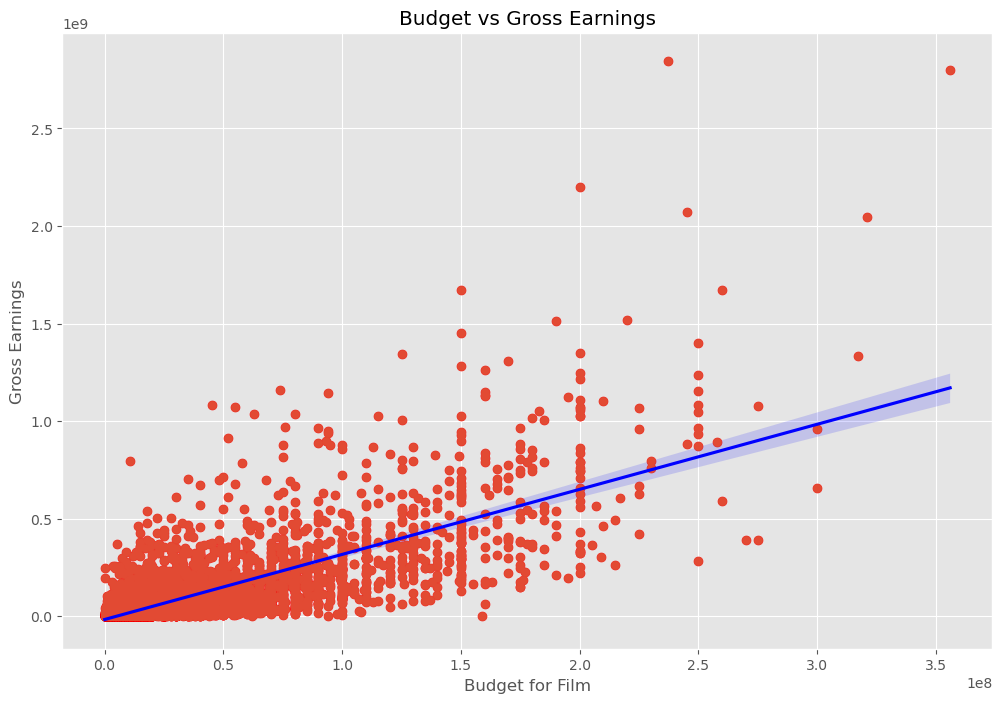

In [113]:
# Scatter plot with budget vs gross
plt.scatter(x=df_new['budget'], y=df_new['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [111]:
# Plot Budget vs Gross using Seaborn
sns.regplot(x='budget', y='gross', data=df_new, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='budget', ylabel='gross'>

In [35]:
df_new.drop(['released'], axis=1).head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,year_correct
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June 13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July 2,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June 20,United States),1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July 2,United States),1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July 25,United States),1980


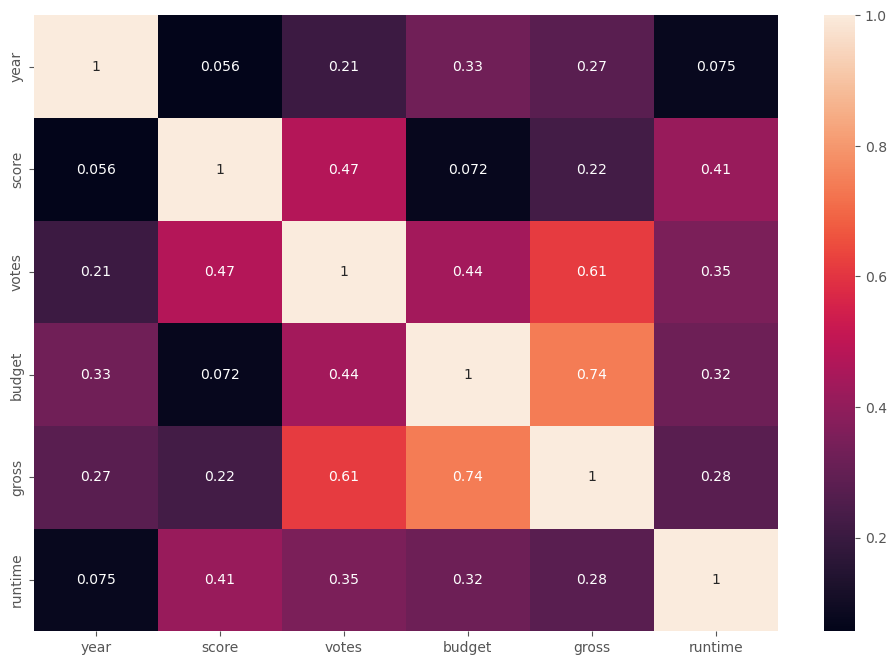

In [160]:
#looking at correlation among variables
correlation_matrix=df_new.corr(method='pearson', min_periods=1, numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [37]:
df_numerized =df_new
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,year_correct
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0,134,47,40
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0,102,47,40
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0,134,47,40
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0,110,47,40
7652,4090,3,0,2020,370,6.8,3700.0,746,1184,1839,8,80000000.0,461421559.0,228,149.0,56,47,40


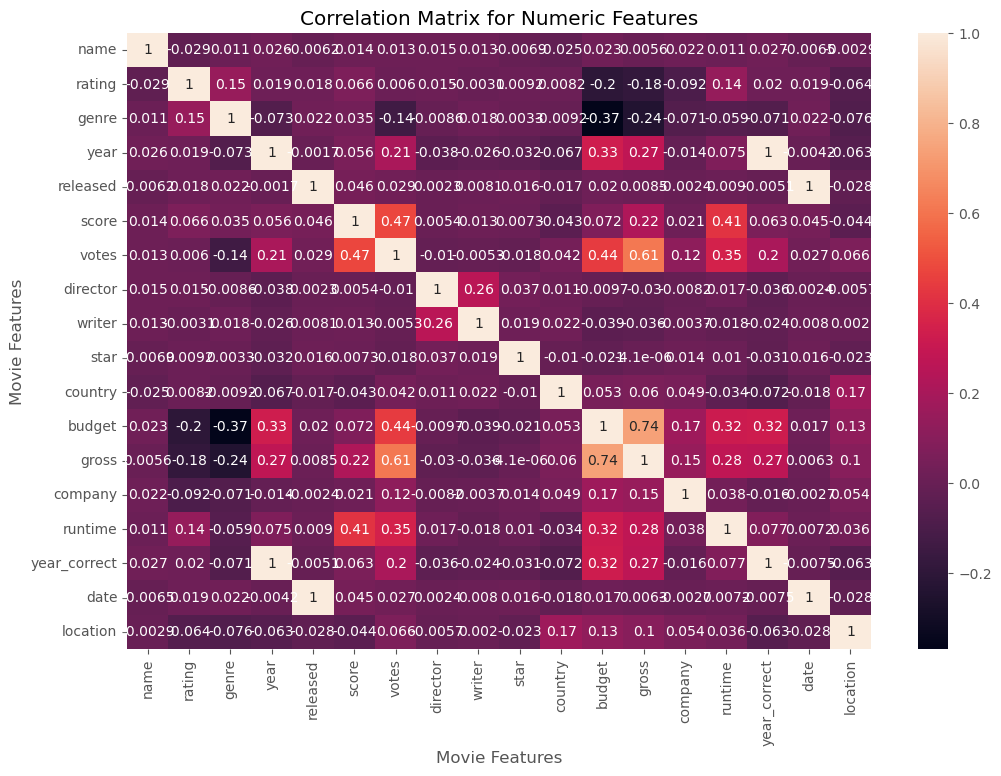

In [172]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [176]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.026759
              date           -0.006511
              location       -0.002908
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director   

In [178]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
rating        company        -0.092357
company       rating         -0.092357
location      genre          -0.075552
genre         location       -0.075552
year          genre          -0.073167
genre         year           -0.073167
country       year_correct   -0.072407
year_correct  country        -0.072407
company       genre          -0.071334
genre         company        -0.071334
year_correct  genre          -0.070699
genre         year_correct   -0.070699
country       year           -0.066748
year          country        -0.066748
rating        location       -0.063883
location      rating     

In [180]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_correct  year            0.996723
year          year_correct    0.996723
date          released        0.999844
released      date            0.999844
name          name            1.000000
year_correct  year_correct    1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
date          date            1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
writer        writer          1.000000
location      location   

### Conculsion: Budget and votes have the highest correlation to gross earnings